#### importing the required libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L1,L2 

#### importing the dataset 

In [2]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\8.twospirals.csv",header=None)
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [3]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [4]:
#creating two other columns 
df["feature_3"]=df["feature_1"]*df["feature_1"]
df["feature_4"]=df["feature_2"]*df["feature_2"]

In [5]:
df.head()

,feature_1,feature_2,label,feature_3,feature_4
0,-2.543456,-10.816358,0,6.469170,116.993590
1,9.434466,-2.572000,0,89.009150,6.615184
2,3.368646,-10.194671,0,11.347774,103.931307
3,1.341407,-4.204140,0,1.799372,17.674795
4,9.547758,-2.220580,0,91.159674,4.930975


#### checking label counts 

In [6]:
df["label"].value_counts()

label
0    1000
1    1000
Name: count, dtype: int64

<Axes: >

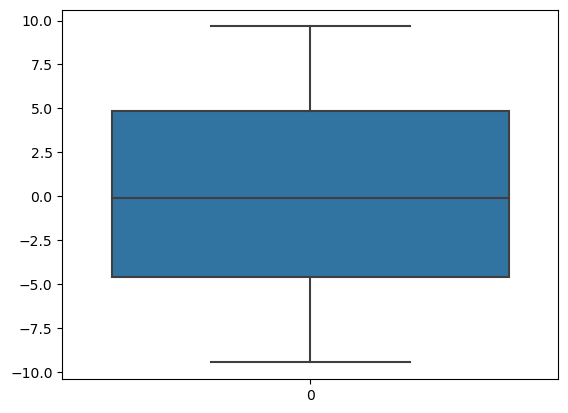

In [7]:
sns.boxplot(df["feature_1"])

<Axes: >

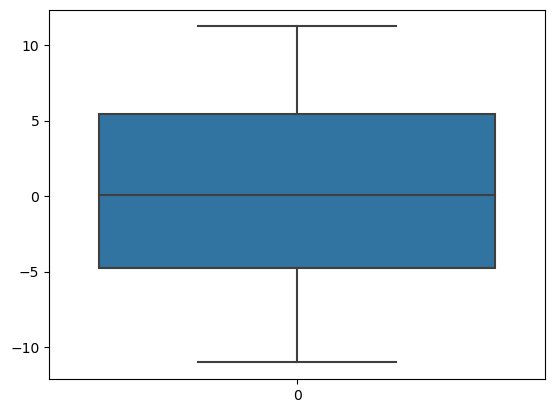

In [8]:
sns.boxplot(df["feature_2"])

<Axes: xlabel='feature_1', ylabel='feature_2'>

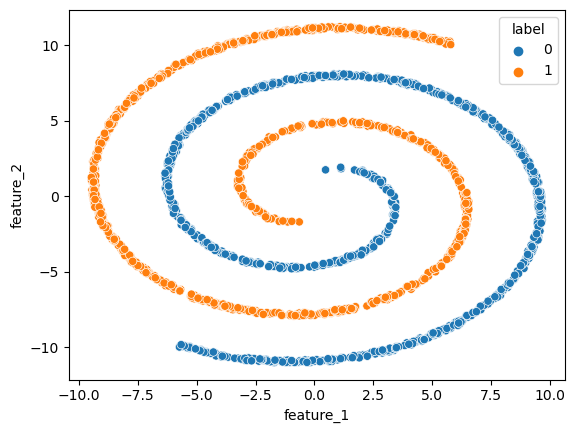

In [9]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  2000 non-null   float64
 1   feature_2  2000 non-null   float64
 2   label      2000 non-null   int64  
 3   feature_3  2000 non-null   float64
 4   feature_4  2000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


#### splitting the data into input and output features as x and y 

In [11]:
## splitting the data into input and output
x=df[["feature_1","feature_2","feature_3","feature_4"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

#### splitting the data into train and test 

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1800, 4) (1800,)
(200, 4) (200,)


#### scaling the input features of both X_train,X_test 

In [14]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### converting input features into principal components 

In [15]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

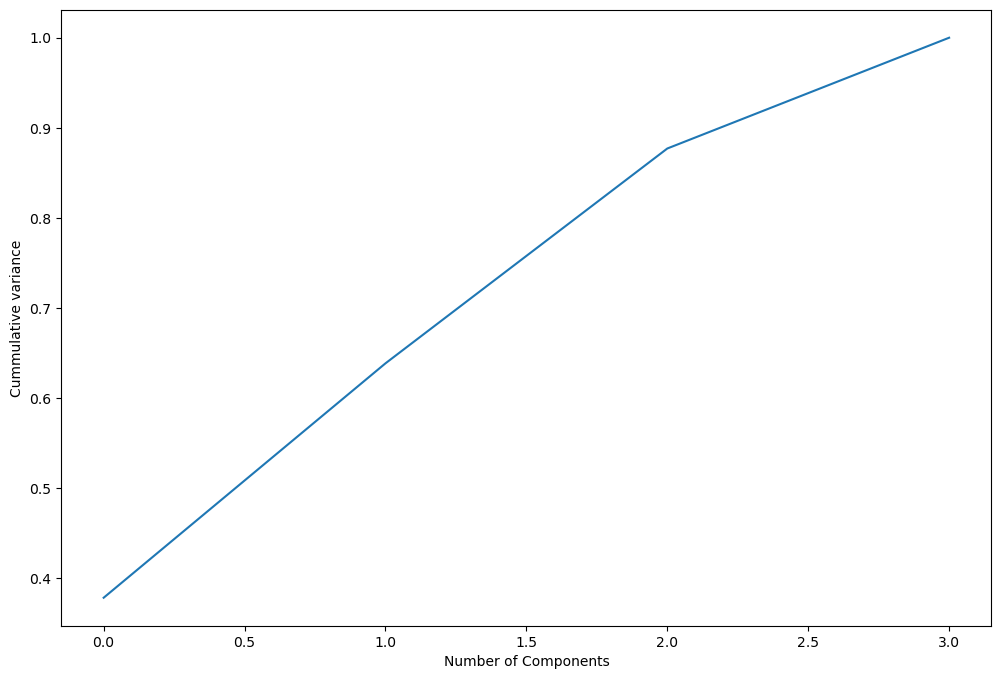

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.37786346, 0.63827253, 0.87693178, 1.        ])

In [18]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components =2, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [19]:
X_train_pca.shape

(1800, 2)

In [20]:
X_test_pca = pca_final.transform(X_test)

#### building the logical structure 

In [22]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
 dense_6 (Dense)             (None, 6)                 66        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [24]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train_pca,y_train,batch_size=50,epochs=1500,validation_split=0.1) 

Epoch 1/1500
33/33 [==============================] - 1s 13ms/step - loss: 0.6992 - accuracy: 0.4883 - val_loss: 0.7049 - val_accuracy: 0.4833
Epoch 2/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6988 - val_accuracy: 0.4778
Epoch 3/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5185 - val_loss: 0.6934 - val_accuracy: 0.5722
Epoch 4/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.5667 - val_loss: 0.6887 - val_accuracy: 0.5500
Epoch 5/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5673 - val_loss: 0.6838 - val_accuracy: 0.5333
Epoch 6/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.5827 - val_loss: 0.6798 - val_accuracy: 0.5444
Epoch 7/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.5938 - val_loss: 0.6763 - val_accuracy: 0.5778
Epoch

33/33 [==============================] - 0s 4ms/step - loss: 0.5314 - accuracy: 0.6660 - val_loss: 0.5120 - val_accuracy: 0.6833
Epoch 116/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.6648 - val_loss: 0.5110 - val_accuracy: 0.6833
Epoch 117/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.5298 - accuracy: 0.6685 - val_loss: 0.5100 - val_accuracy: 0.6944
Epoch 118/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.6710 - val_loss: 0.5091 - val_accuracy: 0.7000
Epoch 119/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.6741 - val_loss: 0.5081 - val_accuracy: 0.7000
Epoch 120/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.6796 - val_loss: 0.5071 - val_accuracy: 0.6833
Epoch 121/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.6698 - val_loss: 0.5059 - val_accuracy: 0.6889
Epoch 1

Epoch 172/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.6920 - val_loss: 0.4557 - val_accuracy: 0.7056
Epoch 173/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.6944 - val_loss: 0.4546 - val_accuracy: 0.7333
Epoch 174/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.6969 - val_loss: 0.4533 - val_accuracy: 0.7167
Epoch 175/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.6920 - val_loss: 0.4525 - val_accuracy: 0.7333
Epoch 176/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.6938 - val_loss: 0.4517 - val_accuracy: 0.7444
Epoch 177/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.6938 - val_loss: 0.4505 - val_accuracy: 0.7333
Epoch 178/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.6963 - val_loss: 0.4496 - val_accuracy:

Epoch 229/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.7586 - val_loss: 0.3919 - val_accuracy: 0.8278
Epoch 230/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.7623 - val_loss: 0.3907 - val_accuracy: 0.8222
Epoch 231/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.7673 - val_loss: 0.3892 - val_accuracy: 0.8611
Epoch 232/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.7765 - val_loss: 0.3881 - val_accuracy: 0.8333
Epoch 233/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4206 - accuracy: 0.7821 - val_loss: 0.3868 - val_accuracy: 0.8444
Epoch 234/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.7840 - val_loss: 0.3858 - val_accuracy: 0.8333
Epoch 235/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.7901 - val_loss: 0.3844 - val_accuracy:

Epoch 286/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.8778 - val_loss: 0.3147 - val_accuracy: 0.9111
Epoch 287/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.8809 - val_loss: 0.3132 - val_accuracy: 0.9222
Epoch 288/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.8864 - val_loss: 0.3115 - val_accuracy: 0.9167
Epoch 289/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8852 - val_loss: 0.3096 - val_accuracy: 0.9111
Epoch 290/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8784 - val_loss: 0.3088 - val_accuracy: 0.9167
Epoch 291/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.8944 - val_loss: 0.3073 - val_accuracy: 0.9167
Epoch 292/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8877 - val_loss: 0.3052 - val_accuracy:

Epoch 343/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.9204 - val_loss: 0.2333 - val_accuracy: 0.9444
Epoch 344/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.9167 - val_loss: 0.2321 - val_accuracy: 0.9389
Epoch 345/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.9123 - val_loss: 0.2301 - val_accuracy: 0.9444
Epoch 346/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.9136 - val_loss: 0.2285 - val_accuracy: 0.9444
Epoch 347/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2690 - accuracy: 0.9185 - val_loss: 0.2277 - val_accuracy: 0.9389
Epoch 348/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.9191 - val_loss: 0.2258 - val_accuracy: 0.9500
Epoch 349/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2668 - accuracy: 0.9154 - val_loss: 0.2252 - val_accuracy:

Epoch 400/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9265 - val_loss: 0.1746 - val_accuracy: 0.9500
Epoch 401/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.9253 - val_loss: 0.1721 - val_accuracy: 0.9556
Epoch 402/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.9290 - val_loss: 0.1763 - val_accuracy: 0.9444
Epoch 403/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.9259 - val_loss: 0.1733 - val_accuracy: 0.9500
Epoch 404/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9265 - val_loss: 0.1714 - val_accuracy: 0.9500
Epoch 405/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.9272 - val_loss: 0.1701 - val_accuracy: 0.9500
Epoch 406/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.9272 - val_loss: 0.1692 - val_accuracy:

Epoch 457/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1842 - accuracy: 0.9377 - val_loss: 0.1398 - val_accuracy: 0.9611
Epoch 458/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1837 - accuracy: 0.9383 - val_loss: 0.1401 - val_accuracy: 0.9611
Epoch 459/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.9426 - val_loss: 0.1410 - val_accuracy: 0.9500
Epoch 460/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9395 - val_loss: 0.1390 - val_accuracy: 0.9667
Epoch 461/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.9407 - val_loss: 0.1411 - val_accuracy: 0.9500
Epoch 462/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.9377 - val_loss: 0.1391 - val_accuracy: 0.9611
Epoch 463/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9383 - val_loss: 0.1397 - val_accuracy:

Epoch 514/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1589 - accuracy: 0.9469 - val_loss: 0.1184 - val_accuracy: 0.9722
Epoch 515/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9506 - val_loss: 0.1201 - val_accuracy: 0.9667
Epoch 516/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9475 - val_loss: 0.1178 - val_accuracy: 0.9722
Epoch 517/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1576 - accuracy: 0.9506 - val_loss: 0.1171 - val_accuracy: 0.9722
Epoch 518/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1569 - accuracy: 0.9494 - val_loss: 0.1207 - val_accuracy: 0.9667
Epoch 519/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.1569 - accuracy: 0.9488 - val_loss: 0.1199 - val_accuracy: 0.9667
Epoch 520/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9506 - val_loss: 0.1169 - val_accuracy:

Epoch 571/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1353 - accuracy: 0.9574 - val_loss: 0.1032 - val_accuracy: 0.9778
Epoch 572/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.9599 - val_loss: 0.1033 - val_accuracy: 0.9778
Epoch 573/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.9605 - val_loss: 0.1031 - val_accuracy: 0.9778
Epoch 574/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1339 - accuracy: 0.9605 - val_loss: 0.1038 - val_accuracy: 0.9722
Epoch 575/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1333 - accuracy: 0.9605 - val_loss: 0.1018 - val_accuracy: 0.9778
Epoch 576/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1332 - accuracy: 0.9593 - val_loss: 0.1021 - val_accuracy: 0.9833
Epoch 577/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9586 - val_loss: 0.1011 - val_accuracy:

Epoch 628/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9642 - val_loss: 0.0887 - val_accuracy: 0.9833
Epoch 629/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9636 - val_loss: 0.0907 - val_accuracy: 0.9722
Epoch 630/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9660 - val_loss: 0.0875 - val_accuracy: 0.9833
Epoch 631/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9642 - val_loss: 0.0888 - val_accuracy: 0.9778
Epoch 632/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9654 - val_loss: 0.0894 - val_accuracy: 0.9833
Epoch 633/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9654 - val_loss: 0.0872 - val_accuracy: 0.9833
Epoch 634/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.1138 - accuracy: 0.9636 - val_loss: 0.0878 - val_accuracy:

Epoch 685/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9691 - val_loss: 0.0762 - val_accuracy: 0.9833
Epoch 686/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9698 - val_loss: 0.0757 - val_accuracy: 0.9833
Epoch 687/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 0.9679 - val_loss: 0.0756 - val_accuracy: 0.9833
Epoch 688/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9673 - val_loss: 0.0763 - val_accuracy: 0.9833
Epoch 689/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1011 - accuracy: 0.9691 - val_loss: 0.0754 - val_accuracy: 0.9833
Epoch 690/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9673 - val_loss: 0.0757 - val_accuracy: 0.9833
Epoch 691/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.1007 - accuracy: 0.9685 - val_loss: 0.0754 - val_accuracy:

Epoch 742/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9698 - val_loss: 0.0684 - val_accuracy: 0.9889
Epoch 743/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 0.9722 - val_loss: 0.0681 - val_accuracy: 0.9833
Epoch 744/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9704 - val_loss: 0.0673 - val_accuracy: 0.9833
Epoch 745/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9685 - val_loss: 0.0662 - val_accuracy: 0.9833
Epoch 746/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.0665 - val_accuracy: 0.9833
Epoch 747/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9704 - val_loss: 0.0677 - val_accuracy: 0.9778
Epoch 748/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9698 - val_loss: 0.0661 - val_accuracy:

Epoch 799/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0814 - accuracy: 0.9735 - val_loss: 0.0620 - val_accuracy: 0.9833
Epoch 800/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0807 - accuracy: 0.9728 - val_loss: 0.0610 - val_accuracy: 0.9889
Epoch 801/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 0.0599 - val_accuracy: 0.9889
Epoch 802/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0810 - accuracy: 0.9722 - val_loss: 0.0591 - val_accuracy: 0.9889
Epoch 803/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9728 - val_loss: 0.0604 - val_accuracy: 0.9778
Epoch 804/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0808 - accuracy: 0.9765 - val_loss: 0.0592 - val_accuracy: 0.9833
Epoch 805/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0802 - accuracy: 0.9772 - val_loss: 0.0601 - val_accuracy:

Epoch 856/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9772 - val_loss: 0.0546 - val_accuracy: 0.9889
Epoch 857/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0731 - accuracy: 0.9753 - val_loss: 0.0544 - val_accuracy: 0.9889
Epoch 858/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9765 - val_loss: 0.0540 - val_accuracy: 0.9889
Epoch 859/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.9759 - val_loss: 0.0546 - val_accuracy: 0.9889
Epoch 860/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0725 - accuracy: 0.9759 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 861/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0535 - val_accuracy: 0.9889
Epoch 862/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9765 - val_loss: 0.0542 - val_accuracy:

Epoch 913/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 0.0510 - val_accuracy: 0.9889
Epoch 914/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0509 - val_accuracy: 0.9889
Epoch 915/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0506 - val_accuracy: 0.9889
Epoch 916/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9784 - val_loss: 0.0501 - val_accuracy: 0.9889
Epoch 917/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.0503 - val_accuracy: 0.9889
Epoch 918/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 0.0525 - val_accuracy: 0.9889
Epoch 919/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0500 - val_accuracy:

Epoch 970/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0477 - val_accuracy: 0.9889
Epoch 971/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0470 - val_accuracy: 0.9889
Epoch 972/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9827 - val_loss: 0.0477 - val_accuracy: 0.9944
Epoch 973/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9840 - val_loss: 0.0478 - val_accuracy: 0.9889
Epoch 974/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.0469 - val_accuracy: 0.9889
Epoch 975/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 0.0478 - val_accuracy: 0.9889
Epoch 976/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0473 - val_accuracy:

Epoch 1027/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0446 - val_accuracy: 0.9889
Epoch 1028/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9821 - val_loss: 0.0444 - val_accuracy: 0.9889
Epoch 1029/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0444 - val_accuracy: 0.9944
Epoch 1030/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 0.9809 - val_loss: 0.0446 - val_accuracy: 0.9944
Epoch 1031/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0552 - accuracy: 0.9821 - val_loss: 0.0470 - val_accuracy: 0.9889
Epoch 1032/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.0498 - val_accuracy: 0.9833
Epoch 1033/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0439 - val_ac

33/33 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0.0474 - val_accuracy: 0.9833
Epoch 1140/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0490 - accuracy: 0.9840 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 1141/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0402 - val_accuracy: 0.9889
Epoch 1142/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 0.9840 - val_loss: 0.0386 - val_accuracy: 0.9889
Epoch 1143/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0480 - accuracy: 0.9827 - val_loss: 0.0465 - val_accuracy: 0.9833
Epoch 1144/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0409 - val_accuracy: 0.9889
Epoch 1145/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0467 - accuracy: 0.9877 - val_loss: 0.0383 - val_accuracy: 0.9944
E

33/33 [==============================] - 0s 6ms/step - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.0337 - val_accuracy: 0.9889
Epoch 1252/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9858 - val_loss: 0.0338 - val_accuracy: 0.9944
Epoch 1253/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0337 - val_accuracy: 0.9944
Epoch 1254/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0384 - val_accuracy: 0.9833
Epoch 1255/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0356 - val_accuracy: 0.9889
Epoch 1256/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 1257/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9846 - val_loss: 0.0361 - val_accuracy: 0.9889
E

33/33 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9889 - val_loss: 0.0413 - val_accuracy: 0.9833
Epoch 1364/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0315 - val_accuracy: 0.9889
Epoch 1365/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9895 - val_loss: 0.0381 - val_accuracy: 0.9833
Epoch 1366/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9907 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 1367/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0301 - val_accuracy: 0.9944
Epoch 1368/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.9870 - val_loss: 0.0360 - val_accuracy: 0.9833
Epoch 1369/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9914 - val_loss: 0.0338 - val_accuracy: 0.9833
E

33/33 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9907 - val_loss: 0.0339 - val_accuracy: 0.9833
Epoch 1476/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9914 - val_loss: 0.0270 - val_accuracy: 0.9889
Epoch 1477/1500
33/33 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9901 - val_loss: 0.0257 - val_accuracy: 0.9944
Epoch 1478/1500
33/33 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9907 - val_loss: 0.0271 - val_accuracy: 0.9944
Epoch 1479/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0438 - val_accuracy: 0.9833
Epoch 1480/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.0325 - val_accuracy: 0.9833
Epoch 1481/1500
33/33 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9926 - val_loss: 0.0256 - val_accuracy: 0.9944
E

#### plotting the train test loss 

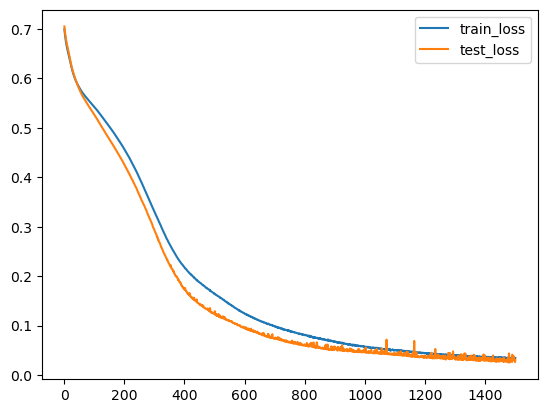

In [25]:
plt.plot(range(1,1501),history.history["loss"],label="train_loss")
plt.plot(range(1,1501),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [26]:
predicted=model.predict(X_test_pca)
predicted

7/7 [==============================] - 0s 2ms/step


array([[3.21516977e-03],
       [3.58568766e-04],
       [1.19250421e-06],
       [9.94252384e-01],
       [4.44882880e-16],
       [8.40665460e-01],
       [4.48188670e-02],
       [9.99998331e-01],
       [9.58131731e-01],
       [7.84312026e-04],
       [9.99996066e-01],
       [8.43651071e-02],
       [9.99999046e-01],
       [1.50457881e-02],
       [3.85496485e-14],
       [9.99828339e-01],
       [9.99524474e-01],
       [9.99991655e-01],
       [1.00000000e+00],
       [9.09115362e-04],
       [9.78897274e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99997854e-01],
       [2.36709159e-11],
       [4.15378585e-02],
       [9.99977946e-01],
       [5.50278664e-01],
       [4.15378585e-02],
       [4.15378585e-02],
       [5.15620798e-07],
       [1.87833066e-04],
       [9.99841452e-01],
       [9.99161839e-01],
       [4.15378585e-02],
       [1.34398206e-03],
       [4.05128094e-06],
       [2.72982717e-02],
       [9.98610139e-01],
       [2.43869834e-02],


#### converting the predicted probablities to the respective labels

In [27]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

#### evaluating the model 

0.99


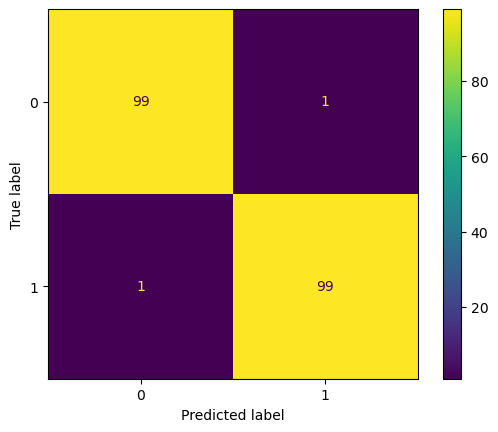

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [29]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 23s 2ms/step


<Axes: >

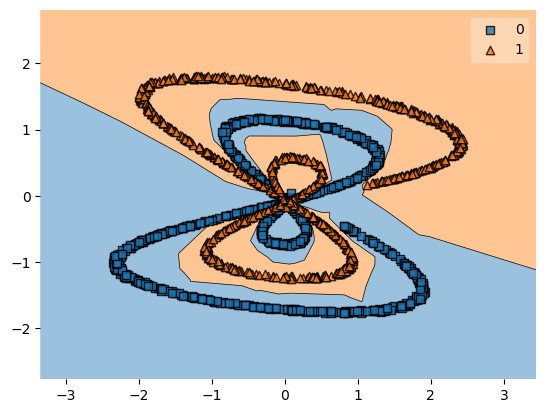

In [30]:
plot_decision_regions(X_train_pca,y_train.values,clf=model)

9600/9600 [==============================] - 24s 2ms/step


<Axes: >

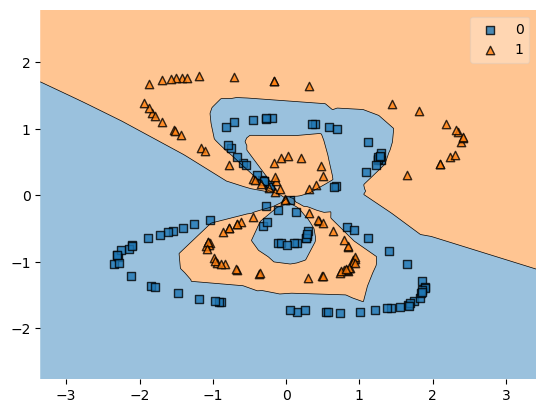

In [31]:
#for test data 
plot_decision_regions(X_test_pca,y_test.values,clf=model)

#### Model Summary 

- We applied feature engineering by adding two more features made from original input features and then used PCA two get the best two features to be used as input to our MultiLayered Neural network.
- This neural network model is showing accuracy of 99 percent
- We have used 3 hidden layers.
- In the First Hidden layers we have used 16 neurons and activation function as relu .
- In the second hidden layers we have used 10 neurons and activation function as relu .
- In the third hidden layers we have used 6 neurons and activation function as relu .
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 50 with learning rate of 0.01. 
- No of epochs used for training this model is 1500.